# 北京公交线网运行情况评价分析

## 0、功能需求

   **通过绘制*不同指标*的*分类型*累积频率分布图，反映北京公交线网运行情况，在图像基础上进行评价分析**

* 十大线路指标：运送速度；公交与小汽车速度比；运营时间；候车时间；到站间隔偏差；速度可靠性；车均载客数；平均满载率；小时最大车均载客量；最大客流断面满载率；

* 六大线路类型：跨五环；普通线路；市郊线路；微循环；五环外；夜班车。

## 1、数据导入

In [1]:
#打开Excel文件
import xlrd

data = xlrd.open_workbook('2019公交线路评价排行榜.xlsx') #打开Excel文件，把文件与py文件放在同一目录下

In [2]:
#显示文件位置
data

In [3]:
#获取Excel中指定的sheet表格文件
table = data.sheet_by_name('00全部线路评价总表')

#获取文件的行数和列数
nrows = table.nrows
ncols = table.ncols
print(nrows,ncols)

1631 11


In [4]:
#显示文件位置
table

## 2、数据处理

数据处理逻辑为：创建10个数组分别用于存储10项计算指标的分类数据，再在十项计算指标的情况分6大车线路类型继续划分成6大数组。

*下面以运送速度为例，讲解数据处理的思维逻辑*

In [5]:
#获取运送速度的所有的数据集合

#创建线路所有类型的集合
speed_key_list = []

#创建线路运送速度的集合
speed_value_list = []

#创建融合线路所有类型和线路运送速度的集合，用于存储一一对应的线路所有类型和线路运送速度的集合
speed_result_list = []

#首先是从整个table中分别获取线路所有类型和线路运送速度（由于python数组中不支持跨列形成数组，所以需要曲线救国，分别提取再融合。这是是分别提取的过程）
for i  in range(1,nrows):
    speed_key_list.append(table.row_values(i)[0])
    speed_value_list.append(table.row_values(i)[1])#这个地方更改对应的数字即可对应不同的十项指标，1对应运送速度，2对应公交与小汽车速度比，参考Excel表格依此类推

#融合一一对应的线路所有类型和线路运送速度集合
for j in range(len(speed_key_list)):
    speed_result_list.append([speed_key_list[j],speed_value_list[j]])
    
#显示融合好的一一对应的线路所有类型和线路运送速度集合
#print(speed_result_list)
    

In [6]:
#获取运送速度下6种线路类型对应的数据

#创建运送速度6种线路类型对应的数组
speed_result_kuawuhuan_list=[]
speed_result_putongxianlu_list=[]
speed_result_shijiaoxianlu_list=[]
speed_result_weixunhuan_list=[]
speed_result_wuhuanwai_list=[]
speed_result_yebanche_list=[]

line_mode = ['跨五环','普通线路','市郊线路','微循环','五环外','夜班车']
#筛选出6种线路类型运送速度对应的数据，添加到数组各自的结果中
for k in range(len(speed_result_list)):
    if speed_result_list[k][0] == line_mode[0]:
        speed_result_kuawuhuan_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[1]:
        speed_result_putongxianlu_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[2] or speed_result_list[k][0] == "市郊线路（89字头）":
        speed_result_shijiaoxianlu_list.append(speed_result_list[k])        
    if speed_result_list[k][0] == line_mode[3]:
        speed_result_weixunhuan_list.append(speed_result_list[k])        
    if speed_result_list[k][0] == line_mode[4]:
        speed_result_wuhuanwai_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[5]:
        speed_result_yebanche_list.append(speed_result_list[k])        
        
        
#显示6种线路类型运送速度对应的数据
# print(speed_result_kuawuhuan_list)
# print(speed_result_putongxianlu_list)
# print(speed_result_shijiaoxianlu_list)
# print(speed_result_weixunhuan_list)
# print(speed_result_wuhuanwai_list)
# print(speed_result_yebanche_list)



speed_result_kuawuhuan_final_list=[]
speed_result_putongxianlu_final_list=[]
speed_result_shijiaoxianlu_final_list=[]
speed_result_weixunhuan_final_list=[]
speed_result_wuhuanwai_final_list=[]
speed_result_yebanche_final_list=[]


for p in range(len(speed_result_kuawuhuan_list)):
    speed_result_kuawuhuan_final_list.append(speed_result_kuawuhuan_list[p][1])
    
for p in range(len(speed_result_putongxianlu_list)):
    speed_result_putongxianlu_final_list.append(speed_result_putongxianlu_list[p][1])  

for p in range(len(speed_result_shijiaoxianlu_list)):
    speed_result_shijiaoxianlu_final_list.append(speed_result_shijiaoxianlu_list[p][1])
    
for p in range(len(speed_result_weixunhuan_list)):
    speed_result_weixunhuan_final_list.append(speed_result_weixunhuan_list[p][1])
    
for p in range(len(speed_result_wuhuanwai_list)):
    speed_result_wuhuanwai_final_list.append(speed_result_wuhuanwai_list[p][1])

for p in range(len(speed_result_yebanche_list)):
    speed_result_yebanche_final_list.append(speed_result_yebanche_list[p][1])


## 3、频数分布图像绘制

In [7]:
# 导入绘图包 matplotlib.pyplot
import matplotlib.pyplot as plt

#导入数据计算包numpy
import numpy as np

#导入频数分布图形绘制专用包seaborn
import seaborn as sns

#由于画图时plt.title默认显示是英文，所以当我们需要设置标体为中文时，需要先设置系统环境,使得输出的标题为中文；
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


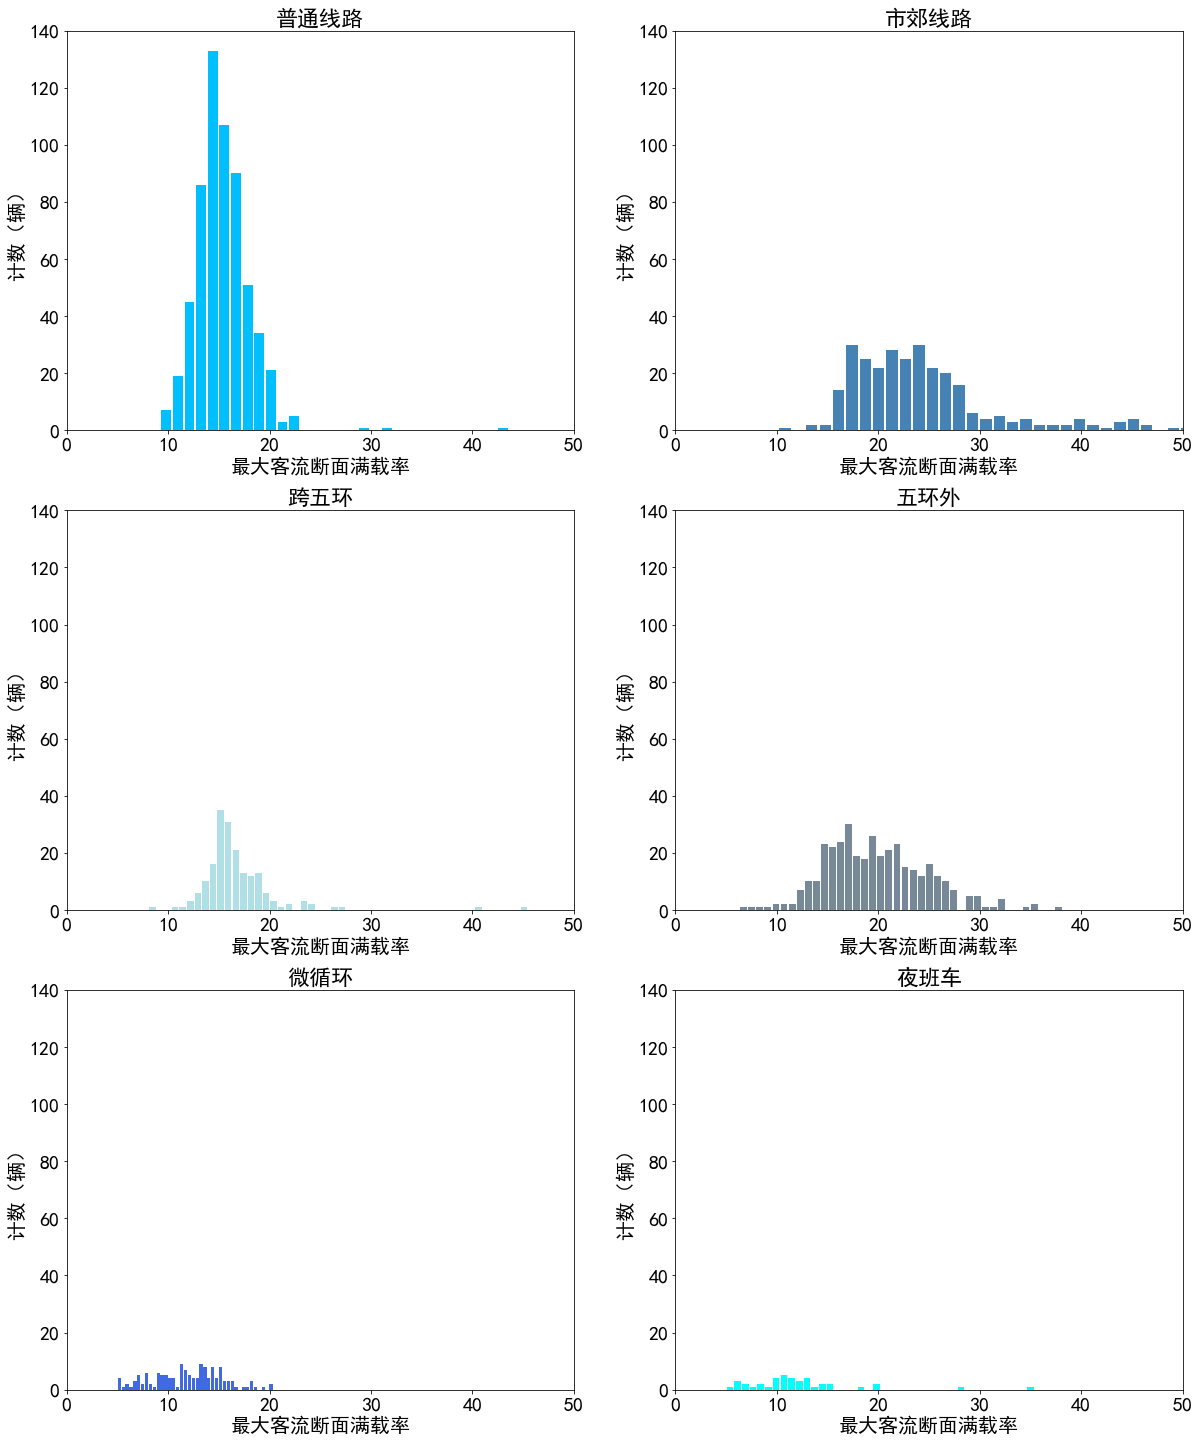

In [8]:
# 绘制初始图像，并定义子图大小尺寸
plt.figure(figsize=(20,25))

#分割出3*2=6个子图，并分别作图
for l in range(1,7):
    plt.subplot(3, 2, l)
    #绘制哪个指标的图就修改对应的标题名称
    plt.xlabel("最大客流断面满载率",fontdict={'size':20})
    plt.ylabel("计数（辆）",fontdict={'size':20})
    #根据具体的图形，设置横纵坐标的刻度
    if l == 1:
        plt.title('普通线路',fontdict={'size':22})
        plt.tick_params(labelsize=20)        
        plt.xlim([0, 50])
        plt.ylim([0, 140])
        plt.hist(speed_result_putongxianlu_final_list, bins=50, histtype='bar', rwidth=0.85, color=['deepskyblue'])
    if l == 2:
        plt.title('市郊线路',fontdict={'size':22})
        plt.tick_params(labelsize=20)       
        plt.xlim([0, 50])
        plt.ylim([0, 140])
        plt.hist(speed_result_shijiaoxianlu_final_list, bins=50, histtype='bar',rwidth=0.85, color=['steelblue'])
    if l == 3:
        plt.title('跨五环',fontdict={'size':22})
        plt.tick_params(labelsize=20)
        plt.xlim([0, 50])
        plt.ylim([0, 140])
        plt.hist(speed_result_kuawuhuan_final_list, bins=50, histtype='bar',rwidth=0.85, color=['powderblue'])
    if l == 4:
        plt.title('五环外',fontdict={'size':22})
        plt.tick_params(labelsize=20)        
        plt.xlim([0, 50])
        plt.ylim([0, 140])
        plt.hist(speed_result_wuhuanwai_final_list, bins=40, histtype='bar', rwidth=0.85,color=['lightslategrey'])
    if l == 5:
        plt.title('微循环',fontdict={'size':22})
        plt.tick_params(labelsize=20)        
        plt.xlim([0, 50])
        plt.ylim([0, 140])
        plt.hist(speed_result_weixunhuan_final_list, bins=40, histtype='bar', rwidth=0.85,color=['royalblue'])
    if l == 6:
        plt.title('夜班车',fontdict={'size':22})
        plt.tick_params(labelsize=20)        
        plt.xlim([0, 50])
        plt.ylim([0,140])
        plt.hist(speed_result_yebanche_final_list, bins=40, histtype='bar', rwidth=0.85,color=['cyan'])
plt.show()        

## 4、绘制频率分布图像 

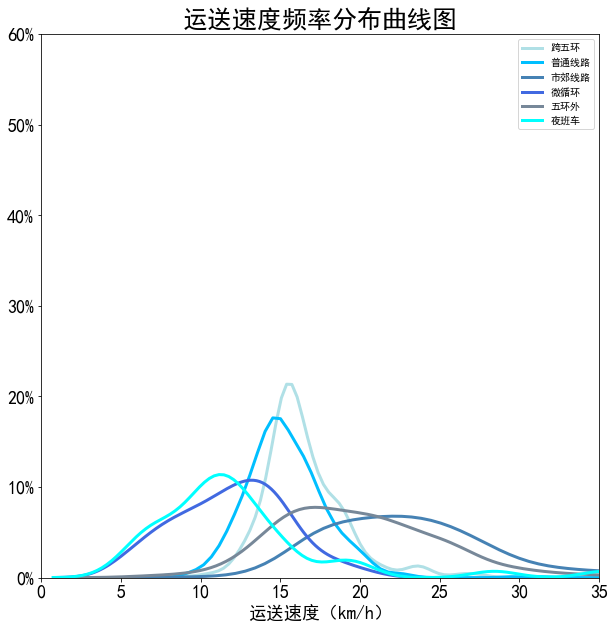

In [9]:
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10,10))
plt.title("运送速度频率分布曲线图",fontdict={'size':25})
plt.tick_params(labelsize=18)   
plt.xlabel('运送速度（km/h）',fontdict={'size':18})
plt.xlim([0, 35])
plt.ylim([0, 0.6])

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


sns.distplot(speed_result_kuawuhuan_final_list,kde=True,hist=False,kde_kws={"color": "powderblue", "lw": 3},label='跨五环')

sns.distplot(speed_result_putongxianlu_final_list,kde=True,hist=False,kde_kws={"color": "deepskyblue", "lw": 3},label='普通线路')

sns.distplot(speed_result_shijiaoxianlu_final_list,kde=True,hist=False,kde_kws={"color": "steelblue", "lw": 3},label='市郊线路')

sns.distplot(speed_result_weixunhuan_final_list,kde=True,hist=False,kde_kws={"color": "royalblue", "lw": 3},label='微循环')

sns.distplot(speed_result_wuhuanwai_final_list,kde=True,hist=False,kde_kws={"color": "lightslategrey", "lw": 3},label='五环外')

sns.distplot(speed_result_yebanche_final_list,kde=True,hist=False,kde_kws={"color": "cyan", "lw": 3},label='夜班车')


## 代码汇总 

1631 11


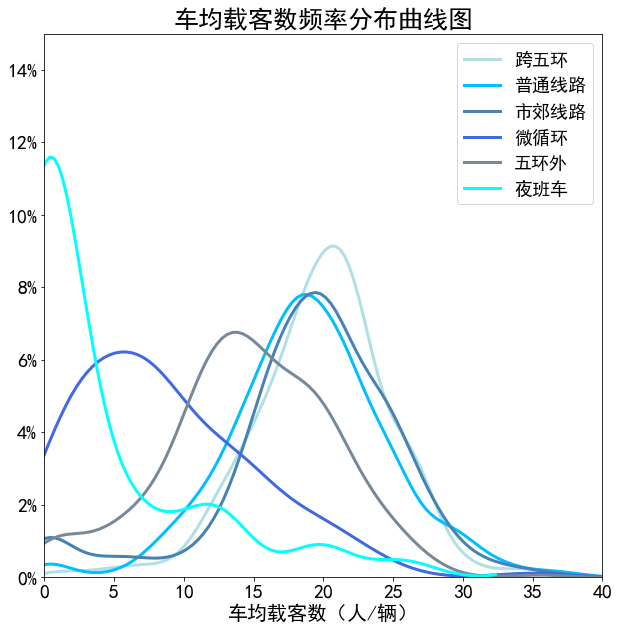

In [10]:
#打开Excel文件
import xlrd

data = xlrd.open_workbook('2019公交线路评价排行榜.xlsx') #打开Excel文件，把文件与py文件放在同一目录下
#获取Excel中指定的sheet表格文件
table = data.sheet_by_name('00全部线路评价总表')

#获取文件的行数和列数
nrows = table.nrows
ncols = table.ncols
print(nrows,ncols)
#获取运送速度的所有的数据集合

#创建线路所有类型的集合
speed_key_list = []

#创建线路运送速度的集合
speed_value_list = []

#创建融合线路所有类型和线路运送速度的集合，用于存储一一对应的线路所有类型和线路运送速度的集合
speed_result_list = []

#首先是从整个table中分别获取线路所有类型和线路运送速度（由于python数组中不支持跨列形成数组，所以需要曲线救国，分别提取再融合。这是是分别提取的过程）
for i  in range(1,nrows):
    speed_key_list.append(table.row_values(i)[0])
    speed_value_list.append(table.row_values(i)[7])#这个地方更改对应的数字即可对应不同的十项指标，1对应运送速度，2对应公交与小汽车速度比，参考Excel表格依此类推

#融合一一对应的线路所有类型和线路运送速度集合
for j in range(len(speed_key_list)):
    speed_result_list.append([speed_key_list[j],speed_value_list[j]])
    
#显示融合好的一一对应的线路所有类型和线路运送速度集合
#print(speed_result_list)
#获取运送速度下6种线路类型对应的数据

#创建运送速度6种线路类型对应的数组
speed_result_kuawuhuan_list=[]
speed_result_putongxianlu_list=[]
speed_result_shijiaoxianlu_list=[]
speed_result_weixunhuan_list=[]
speed_result_wuhuanwai_list=[]
speed_result_yebanche_list=[]

line_mode = ['跨五环','普通线路','市郊线路','微循环','五环外','夜班车']
#筛选出6种线路类型运送速度对应的数据，添加到数组各自的结果中
for k in range(len(speed_result_list)):
    if speed_result_list[k][0] == line_mode[0]:
        speed_result_kuawuhuan_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[1]:
        speed_result_putongxianlu_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[2] or speed_result_list[k][0] == "市郊线路（89字头）":
        speed_result_shijiaoxianlu_list.append(speed_result_list[k])        
    if speed_result_list[k][0] == line_mode[3]:
        speed_result_weixunhuan_list.append(speed_result_list[k])        
    if speed_result_list[k][0] == line_mode[4]:
        speed_result_wuhuanwai_list.append(speed_result_list[k])
    if speed_result_list[k][0] == line_mode[5]:
        speed_result_yebanche_list.append(speed_result_list[k])        
        
        
#显示6种线路类型运送速度对应的数据
# print(speed_result_kuawuhuan_list)
# print(speed_result_putongxianlu_list)
# print(speed_result_shijiaoxianlu_list)
# print(speed_result_weixunhuan_list)
# print(speed_result_wuhuanwai_list)
# print(speed_result_yebanche_list)



speed_result_kuawuhuan_final_list=[]
speed_result_putongxianlu_final_list=[]
speed_result_shijiaoxianlu_final_list=[]
speed_result_weixunhuan_final_list=[]
speed_result_wuhuanwai_final_list=[]
speed_result_yebanche_final_list=[]


for p in range(len(speed_result_kuawuhuan_list)):
    speed_result_kuawuhuan_final_list.append(speed_result_kuawuhuan_list[p][1])
    
for p in range(len(speed_result_putongxianlu_list)):
    speed_result_putongxianlu_final_list.append(speed_result_putongxianlu_list[p][1])  

for p in range(len(speed_result_shijiaoxianlu_list)):
    speed_result_shijiaoxianlu_final_list.append(speed_result_shijiaoxianlu_list[p][1])
    
for p in range(len(speed_result_weixunhuan_list)):
    speed_result_weixunhuan_final_list.append(speed_result_weixunhuan_list[p][1])
    
for p in range(len(speed_result_wuhuanwai_list)):
    speed_result_wuhuanwai_final_list.append(speed_result_wuhuanwai_list[p][1])

for p in range(len(speed_result_yebanche_list)):
    speed_result_yebanche_final_list.append(speed_result_yebanche_list[p][1])
# 导入绘图包 matplotlib.pyplot
import matplotlib.pyplot as plt

#导入数据计算包numpy
import numpy as np

#导入频数分布图形绘制专用包seaborn
import seaborn as sns

#由于画图时plt.title默认显示是英文，所以当我们需要设置标体为中文时，需要先设置系统环境,使得输出的标题为中文；
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
   
import pandas as pd

plt.figure(figsize=(10,10))
plt.title("车均载客数频率分布曲线图",fontdict={'size':25})
plt.xlabel('车均载客数（人/辆）',fontdict={'size':20})
plt.tick_params(labelsize=20)   
speed_result_kuawuhuan_final_list = pd.Series(speed_result_kuawuhuan_final_list,name='车均载客数（人/辆）')
plt.xlim([0, 40])
plt.ylim([0,0.15])


from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


sns.distplot(speed_result_kuawuhuan_final_list,kde=True,hist=False,kde_kws={"color": "powderblue", "lw": 3}, label='跨五环')

sns.distplot(speed_result_putongxianlu_final_list,kde=True,hist=False,kde_kws={"color": "deepskyblue", "lw": 3}, label='普通线路')

sns.distplot(speed_result_shijiaoxianlu_final_list,kde=True,hist=False,kde_kws={"color": "steelblue", "lw": 3}, label='市郊线路')

sns.distplot(speed_result_weixunhuan_final_list,kde=True,hist=False,kde_kws={"color": "royalblue", "lw": 3}, label='微循环')

sns.distplot(speed_result_wuhuanwai_final_list,kde=True,hist=False,kde_kws={"color": "lightslategrey", "lw": 3}, label='五环外')

sns.distplot(speed_result_yebanche_final_list,kde=True,hist=False,kde_kws={"color": "cyan", "lw": 3}, label='夜班车')


plt.legend(fontsize=18)
